<a href="https://colab.research.google.com/github/rhycardo/deep_learning/blob/master/Cancer_de_Mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Sumario da RNA
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                500       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 3,101
Trainable params: 3,101
Non-trainable params: 0
_________________________________________________________________

Accuracia: 99.42%

Matriz de Confusão
     pred_neg  pred_pos
neg       132         1
pos         0        38


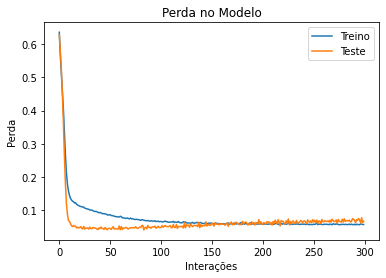

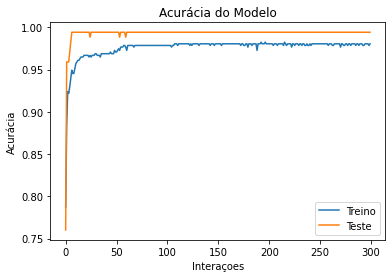

In [1]:
## PREPARAÇÃO DO AMBIENTE DE PROCESSAMENTO
import pandas as pd
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Inicialização das variáveis randomicas
# sempre com a mesma semente
rn.seed(1)
np.random.seed(1)
tf.compat.v1.set_random_seed(1)

## PREPARAÇÃO DOS DADOS ##
# Obter matriz de dados da URL
dataset = pd.read_csv('https://pastebin.com/raw/sC8NHL8n').values   

# Dividir matriz de dados em uma matriz X e um vetor Y
x  = dataset[:, 1:10]              # Colunas de 1 ate 9
y  = dataset[:, 10]                # coluna 10

# Normalizar dados da matriz e do vetor (0 ou 1)
x  = np.round(1+x/10, 0)-1    
y  = np.round(y/4, 0)         

# Separação dados de Treinamento (75%) e de Teste (25%)
xtrn, xtst, ytrn, ytst = train_test_split(x, y, 
    train_size=0.75, 
    random_state=0,
    shuffle=False         # Não embaralhar os dados
)                

## DEFINIÇÃO DO MODELO DA RNA ##
model = tf.keras.Sequential([
    layers.Dense(50, input_dim=9, activation="relu"),
    layers.Dense(50, activation="relu"),
    layers.Dense(1, activation="sigmoid")]
)

## COMPILAÇÃO
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

## TREINAMENTO DA RNA ##
num_epochs = 300
history=model.fit(xtrn, ytrn,
    epochs=num_epochs,
    verbose=0,
    validation_data=(xtst,ytst)
)

## TESTE DA RNA ##
yprd = model.predict(xtst)
yprd = np.round(yprd,0)

## APRESENTAÇÃO DOS RESULTADOS ##
# Sumario da RNA
print("\nSumario da RNA")
model.summary()

# Acurácia
scores = model.evaluate(xtst,ytst, verbose=0)
print("\nAccuracia: %.2f%%" % (scores[1]*100))

# Matriz de confusão
print("\nMatriz de Confusão")
print(pd.DataFrame(confusion_matrix(ytst, yprd),
    index=['neg', 'pos'],
    columns=['pred_neg', 'pred_pos'])
)

# Grafico de Perdas
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perda no Modelo')
plt.ylabel('Perda')
plt.xlabel('Interações')
plt.legend(['Treino', 'Teste'], loc='upper right')
plt.show()

# Grafico da Acuracia
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Interaçoes')
plt.legend(['Treino', 'Teste'], loc='lower right')
plt.show()